# Practical Machine Learning for Physicists
## Coursework C -- Part 1


### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to Moodle. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.15.0


In [ ]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images=train_images/255.0
test_images=test_images/255.0

train_images.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

### Task 1:
In configuring my single convolution layer network, I aimed for simplicity and efficiency by utilising the fewest possible layers, ultimately settling on 5. Through a process of trial and error, I varied the values for my filter, neuron and epoch parameters to optimise the network and improve its final accuracy. Successfully, I attained an impressive accuracy rate of 99%. Additionally, I observed that increasing the number of filters, neurons and epochs resulted in a longer runtime. As a consequence, my aim was to strike a balance, ensuring a short runtime for the network while upholding a high level of accuracy.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 7)         70        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 7)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1183)              0         
                                                                 
 dense_4 (Dense)             (None, 12)                14208     
                                                                 
 dense_5 (Dense)             (None, 10)                130       
                                                                 
Total params: 14408 (56.28 KB)
Trainable params: 14408 (56.28 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

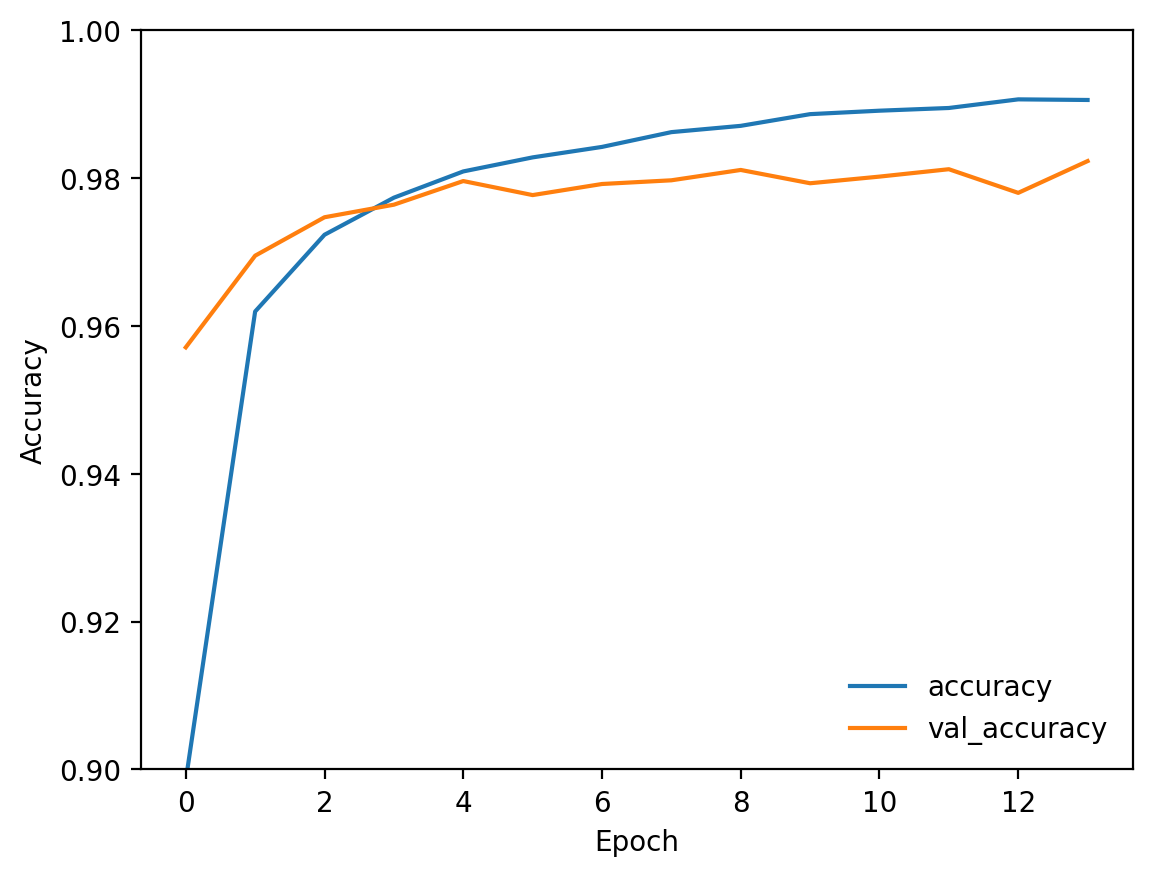

In [ ]:
def singleconvolayer(filter, neuron, epoch):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filter, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(neuron, activation='relu'))
    model.add(keras.layers.Dense(10))
    model.summary()
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epoch,
                        validation_data=(test_images, test_labels))

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    #Plot the accuracy curve
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.90, 1])
    plt.legend(loc='lower right')

    return history

singleconvolayer(7, 12, 14)

Looking at the graph above, we can see that accuracy and val_accuracy curve diverge by only 0.8%, which is much smaller than the overfitted example given in the moodle notes. Therefore this doesn't suggest that we overfitted our model to the training data set.




### Task 2:
For task 2, I adopted a strategy akin to task 1, aiming to minimize the number of layers in my neural network. Consequently, I incorporated only two convolution layers, which proved sufficient for achieving a high level of accuracy. Interestingly, the inclusion of additional convolution layers led to a noticeable 10-second increase in runtime per epoch, yielding a comparable final accuracy. Given this observation, I concluded that two convolution layers were optimal.

Ultimately, my approach resulted in a final accuracy of 99.5%.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 27)        270       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 27)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 27)        6588      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 27)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 675)               0         
                                                                 
 dense_10 (Dense)            (None, 27)               

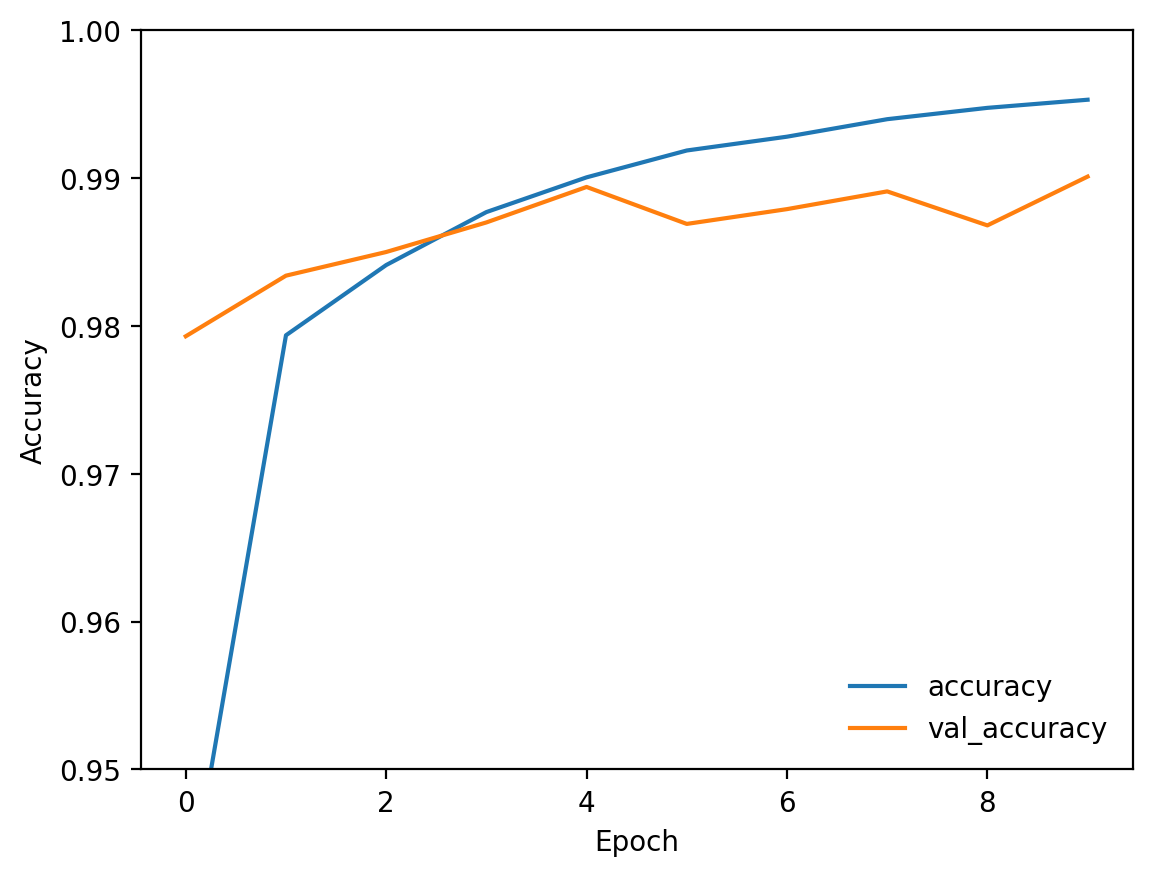

In [ ]:
def manyconvolayer(filter,neuron,epoch):
  model = keras.models.Sequential()

  model.add(keras.layers.Conv2D(filter, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(keras.layers.MaxPooling2D((2, 2)))

  model.add(keras.layers.Conv2D(neuron, (3, 3), activation='relu'))
  model.add(keras.layers.MaxPooling2D((2, 2)))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(neuron, activation='relu'))
  model.add(keras.layers.Dense(10))
  model.summary()
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  history1 = model.fit(train_images, train_labels, epochs=epoch,
                    validation_data=(test_images, test_labels))

  plt.plot(history1.history['accuracy'], label='accuracy')
  plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.95, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

  return history1

manyconvolayer(27,27,10)


Looking at the graph above, we can see that accuracy and val_accuracy curve diverge by only 0.5%, which is much smaller than the overfitted example given in the moodle notes. Therefore this doesn't suggest that we overfitted our model to the training data set.

Additionally, comparing the two graphs, we notice that they are very simliar to one another and share simliar curve paths, which suggests that add an additionaly convolution layer did not have a significantly large affect on our model.




# Conclusion:

In conclusion, this notebook addressed the classification of MNIST handwritten digits using neural networks with varying convolutional layer complexities. In Task 1, a single convolutional layer network was designed and optimised with five additional layers to achieve a maximum test accuracy of 99%. The analysis of the accuracy curve indicated potential overfitting around epoch 3. Moving on to Task 2, the approach involved minimising the number of layers while incorporating two convolutional layers, resulting in a final accuracy of 99.5%. Despite observing a slight divergence in the accuracy and validation accuracy curves around epoch 3, similar trends were noticed between the two tasks, suggesting that the addition of an extra convolutional layer did not significantly impact the model's performance. Overall, the notebook demonstrated clarity in coding practices and presented coherent discussions on network performance, efficiency, and training.